In [1]:
import json, requests, sys
import networkx as nx
import matplotlib.pyplot as plt

In [151]:
url = 'https://api.openalex.org/works?filter=raw_affiliation_string.search:UBICS&per-page=200'

In [152]:
response = requests.get(url).json()

In [153]:
data_pub = response['results']

In [154]:
len(data_pub)

200

In [155]:
data_pub[0]

{'id': 'https://openalex.org/W2937966539',
 'doi': 'https://doi.org/10.1242/dev.151894',
 'title': 'Brassinosteroid signaling in plant development and adaptation to stress',
 'display_name': 'Brassinosteroid signaling in plant development and adaptation to stress',
 'relevance_score': 1105.7295,
 'publication_year': 2019,
 'publication_date': '2019-03-01',
 'ids': {'openalex': 'https://openalex.org/W2937966539',
  'doi': 'https://doi.org/10.1242/dev.151894',
  'mag': '2937966539',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/30872266',
  'pmcid': 'https://www.ncbi.nlm.nih.gov/pmc/articles/6432667'},
 'language': 'en',
 'primary_location': {'is_oa': True,
  'landing_page_url': 'https://doi.org/10.1242/dev.151894',
  'pdf_url': 'https://dev.biologists.org/content/develop/146/5/dev151894.full.pdf',
  'source': {'id': 'https://openalex.org/S86558740',
   'display_name': 'Development',
   'issn_l': '0950-1991',
   'issn': ['1477-9129', '0950-1991'],
   'is_oa': False,
   'is_in_doaj': False,


In [156]:
data_pub[0]['id']

'https://openalex.org/W2937966539'

In [157]:
data_pub[0]['referenced_works']

['https://openalex.org/W1505270625',
 'https://openalex.org/W1620028706',
 'https://openalex.org/W1966633842',
 'https://openalex.org/W1967517791',
 'https://openalex.org/W1973157773',
 'https://openalex.org/W1984197456',
 'https://openalex.org/W1993773504',
 'https://openalex.org/W1994207647',
 'https://openalex.org/W1997054375',
 'https://openalex.org/W1998059130',
 'https://openalex.org/W2003679101',
 'https://openalex.org/W2007353039',
 'https://openalex.org/W2017408936',
 'https://openalex.org/W2022785470',
 'https://openalex.org/W2024343928',
 'https://openalex.org/W2025190012',
 'https://openalex.org/W2029090648',
 'https://openalex.org/W2031391689',
 'https://openalex.org/W2032152188',
 'https://openalex.org/W2033191061',
 'https://openalex.org/W2038593526',
 'https://openalex.org/W2040811909',
 'https://openalex.org/W2043215109',
 'https://openalex.org/W2046136798',
 'https://openalex.org/W2048180836',
 'https://openalex.org/W2051745913',
 'https://openalex.org/W2052166160',
 

Save only each paper_id and generate a network of self-cited publications

In [158]:
connected_papers = {}
for result in data_pub:
    connected_papers[result['id']] = result['referenced_works']

In [159]:
connected_papers.keys()

dict_keys(['https://openalex.org/W2937966539', 'https://openalex.org/W2807023233', 'https://openalex.org/W2569951966', 'https://openalex.org/W2559903296', 'https://openalex.org/W2963775176', 'https://openalex.org/W2592232498', 'https://openalex.org/W3099867946', 'https://openalex.org/W3000175145', 'https://openalex.org/W2963486691', 'https://openalex.org/W2919052965', 'https://openalex.org/W2329833558', 'https://openalex.org/W2909951524', 'https://openalex.org/W3024072616', 'https://openalex.org/W2962705874', 'https://openalex.org/W3098387002', 'https://openalex.org/W2563438664', 'https://openalex.org/W2978986523', 'https://openalex.org/W2626945340', 'https://openalex.org/W2578877362', 'https://openalex.org/W2941401642', 'https://openalex.org/W2954730976', 'https://openalex.org/W2783511421', 'https://openalex.org/W2587515860', 'https://openalex.org/W2984778902', 'https://openalex.org/W3013215511', 'https://openalex.org/W2802719193', 'https://openalex.org/W2524092555', 'https://openalex

In [160]:
def construct_nx(data):
    # create a directed graph
    G = nx.DiGraph()

    # add the root paper node to the graph
    for root_paper_id in data.keys():
        id = root_paper_id.replace('https://openalex.org/', '')
        G.add_node(id, label = id)

    for root_paper_id in data.keys():
        id = root_paper_id.replace('https://openalex.org/', '')
        for cited_paper_id in data[root_paper_id]:
            cited_id = cited_paper_id.replace('https://openalex.org/', '')
            if (cited_paper_id in data.keys()) and (cited_paper_id != root_paper_id):
                G.add_node(cited_id)
                G.add_edge(id, cited_id, alpha = 0.2)
            else:
                continue

    # return network
    return G

In [161]:
citation_network = construct_nx(connected_papers)

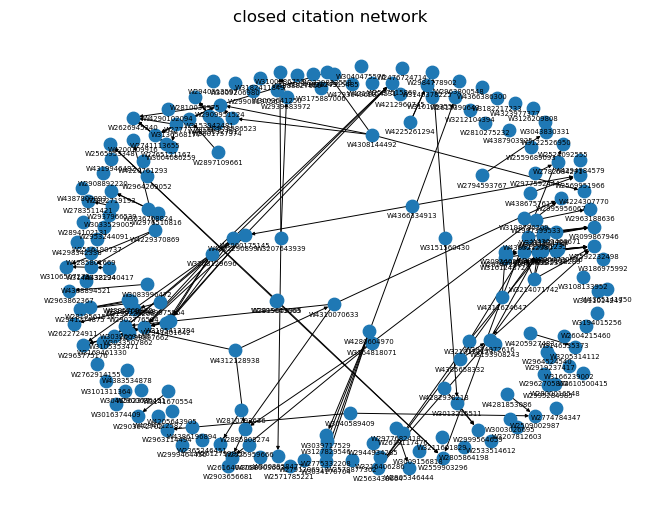

In [164]:
#draw the network
node_pos = nx.spring_layout(citation_network)
# unconnected_nodes = list(nx.isolates(citation_network))
# effective_nodes = [e for e in connected_papers.keys() if e not in unconnected_nodes]
nx.draw(citation_network, node_pos, with_labels = False, node_size=80, font_size=4, width=0.7, arrowsize=5)
# nx.draw(citation_network.subgraph(effective_nodes), node_pos, with_labels = False, node_size=80, font_size=4, width=0.7, arrowsize=5)
node_label_positions = {node: (pos[0], pos[1]-0.05) for node, pos in node_pos.items()}
labels = nx.get_node_attributes(citation_network, 'label')
nx.draw_networkx_labels(citation_network, pos=node_label_positions, labels=labels, font_size=5)
plt.title('closed citation network')
plt.savefig('network_self_cit.pdf')

plt.show()